In [ ]:
# Meeting notes
# risk - 33%
# profit - 77%
# can look at multiple pairs if needed

In [1]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

In [2]:
# data import 
df = pd.read_excel('Time Series Data.xlsx', index_col = 'Day')
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,...,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
Day,,,,,,,,,,,,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.172920,100.589993,103.823464,98.644063,99.750482,106.614321,101.767999,100.732626,99.952576,100.227093,...,101.568951,99.730607,99.673906,99.409461,99.113705,100.012563,100.311565,99.887188,96.556886,97.922078
2,98.579911,98.767737,107.058757,97.936942,99.220660,110.602917,100.681776,100.383846,99.617067,100.246064,...,106.193229,101.541426,99.977798,99.577298,99.783831,99.682467,100.366287,99.902872,95.608782,100.000000
3,98.397809,97.087379,107.352843,100.000000,99.251805,113.424191,102.651998,101.569981,98.659381,101.230321,...,106.936416,100.938414,99.278429,99.055138,100.875486,99.637414,100.767880,100.216365,95.109780,100.000000
4,99.051233,99.716206,105.587978,99.703996,99.407530,113.715275,100.710685,101.081407,99.760755,101.040888,...,107.018993,101.448655,99.979185,99.602163,100.162127,100.379047,101.058262,100.323414,90.469062,99.480519


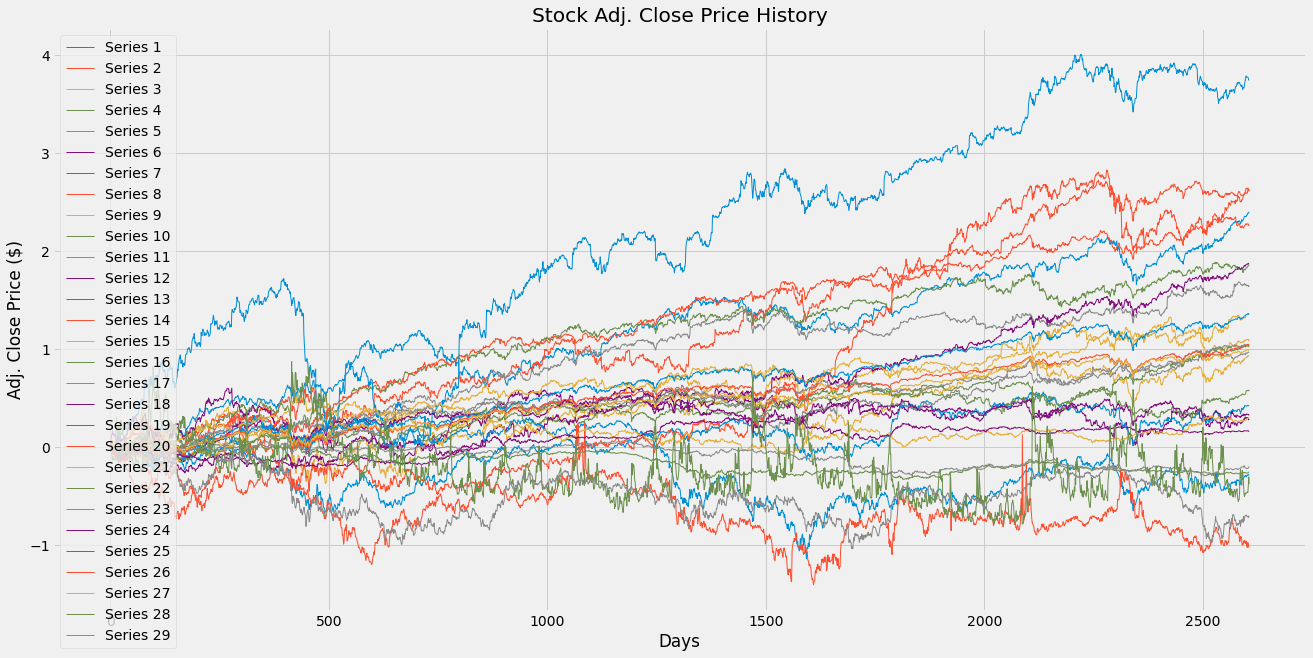

In [3]:
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(np.log(df)-np.log(100), linewidth = 1)
plt.title('Stock Adj. Close Price History')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(df, loc='upper left')
plt.show()


,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,...,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
Series 1,NaN,0.940150,NaN,0.912122,NaN,NaN,NaN,0.964281,0.959751,NaN,...,NaN,NaN,NaN,NaN,NaN,0.972865,0.958556,0.966878,NaN,NaN
Series 2,0.940150,NaN,NaN,NaN,NaN,NaN,NaN,0.951644,0.950948,NaN,...,NaN,NaN,NaN,NaN,NaN,0.952508,0.923071,0.948235,NaN,NaN
Series 3,NaN,NaN,NaN,NaN,NaN,NaN,0.944275,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.916312,0.914526,0.919681,NaN,NaN
Series 4,0.912122,NaN,NaN,NaN,0.970505,NaN,NaN,0.958921,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.957274,0.974444,0.955998,NaN,NaN
Series 5,NaN,NaN,NaN,0.970505,NaN,NaN,NaN,0.939942,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.940522,0.958400,0.928581,NaN,NaN
Series 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series 7,NaN,NaN,0.944275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series 8,0.964281,0.951644,NaN,0.958921,0.939942,NaN,NaN,NaN,0.961210,NaN,...,NaN,NaN,NaN,NaN,NaN,0.989185,0.984121,0.984428,NaN,NaN
Series 9,0.959751,0.950948,NaN,NaN,NaN,NaN,NaN,0.961210,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.970815,0.955839,0.966816,NaN,NaN
Series 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


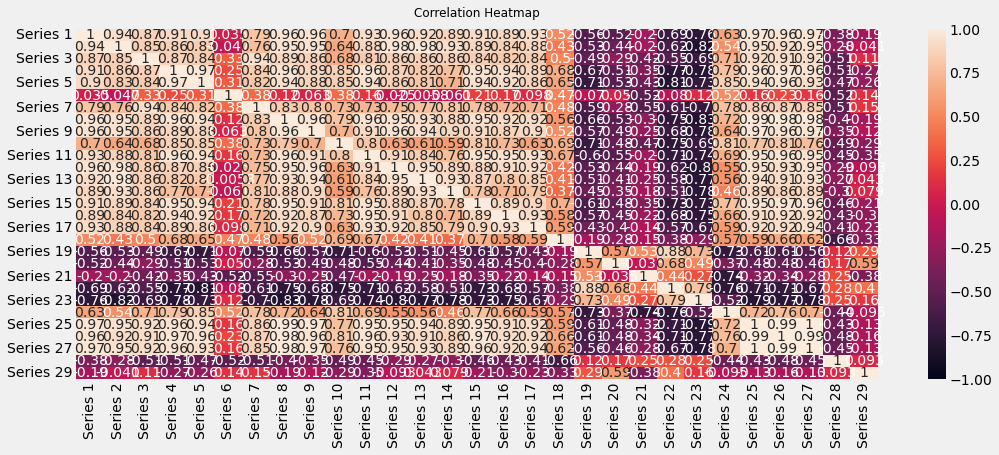

In [4]:
# finding correlations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# finding largest correlations
cor = df.corr()
cor[(cor > 0.9) & (cor < 1)]


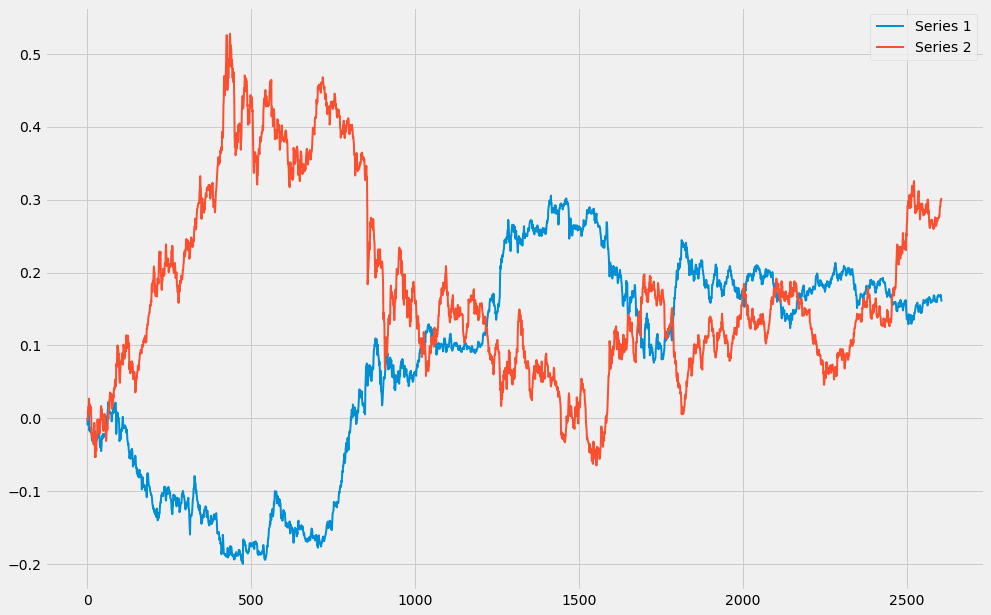

In [5]:
# potential pair
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(np.log(df[['Series 24', 'Series 21']])-np.log(100), linewidth = 2)
ax.legend(df)
plt.show()

In [46]:
# moving average strategy
# ma function

def MA(data, window, lag): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    
    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = 0: short position, flag = -1: no position
    flag = -1

    for i in range(len(data)):
        if i == len(data)-1:
            if flag == 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else: 
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 0
        elif SMA[i] < data[i]*(1-lag/100):
            if flag != 1:
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif SMA[i] > data[i]*(1+lag/100):
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell)
    

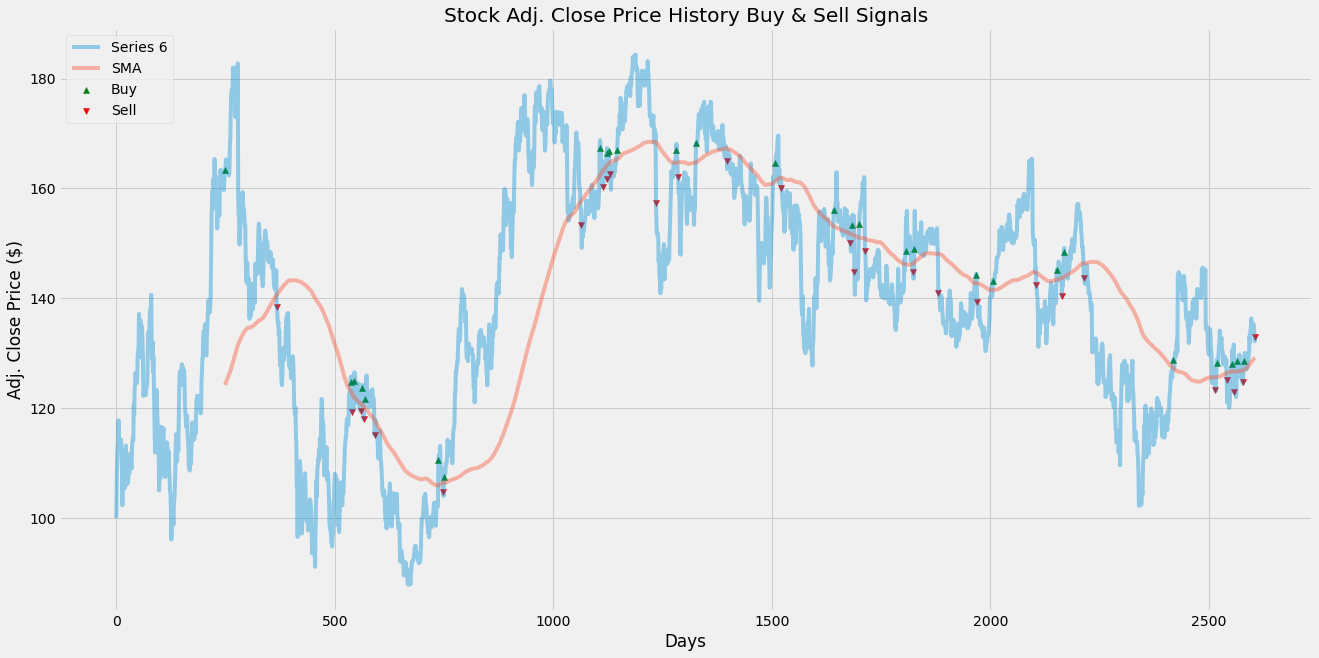

In [300]:
# To test, change window and the series used

# =========================================
# variables
window = 250
series = 'Series 6'
lag = 1
# =========================================

#Store the buy and sell data into a variable
buy_sell_data = MA(df[series], window, lag)

# visualise test
plt.figure(figsize=(20, 10))
plt.plot(df[series], label=series, alpha=0.4)
plt.plot(df[series].rolling(window=window).mean(), label='SMA', alpha=0.4)
plt.scatter(df.index, buy_sell_data[0], label='Buy', marker='^', color='green')
plt.scatter(df.index, buy_sell_data[1], label='Sell', marker='v', color='red')
plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()



In [301]:
#Calculating returns

def Backtest(data, buy_sell):
    
    profit = np.nansum(buy_sell[1]) - np.nansum(buy_sell[0])
    data_profit = data.iloc[-1] - data[0]
    rel_profit = profit - data_profit
    
    return rel_profit


In [302]:
# profit test 
p = Backtest(df[series], MA(df[series], window, lag))
p


-138.93508083175257

In [297]:
# Testing all date

# variables
lag = 0
upper_window = 200
lower_window = 5

profit_df = pd.DataFrame(columns = df.columns)

# iterating over different windows and series to find matrix of returns
for i in np.linspace(lower_window,upper_window,int(upper_window/10)):
    
    profit = []
    
    for column in df:
        
        profit.append(Backtest(df[column], MA(df[column], int(i), lag)))
    
    profits = pd.DataFrame(columns = df.columns).transpose()
    profits[i] = profit
    profits = profits.transpose()
    
    profit_df = pd.concat([profit_df, profits])
    

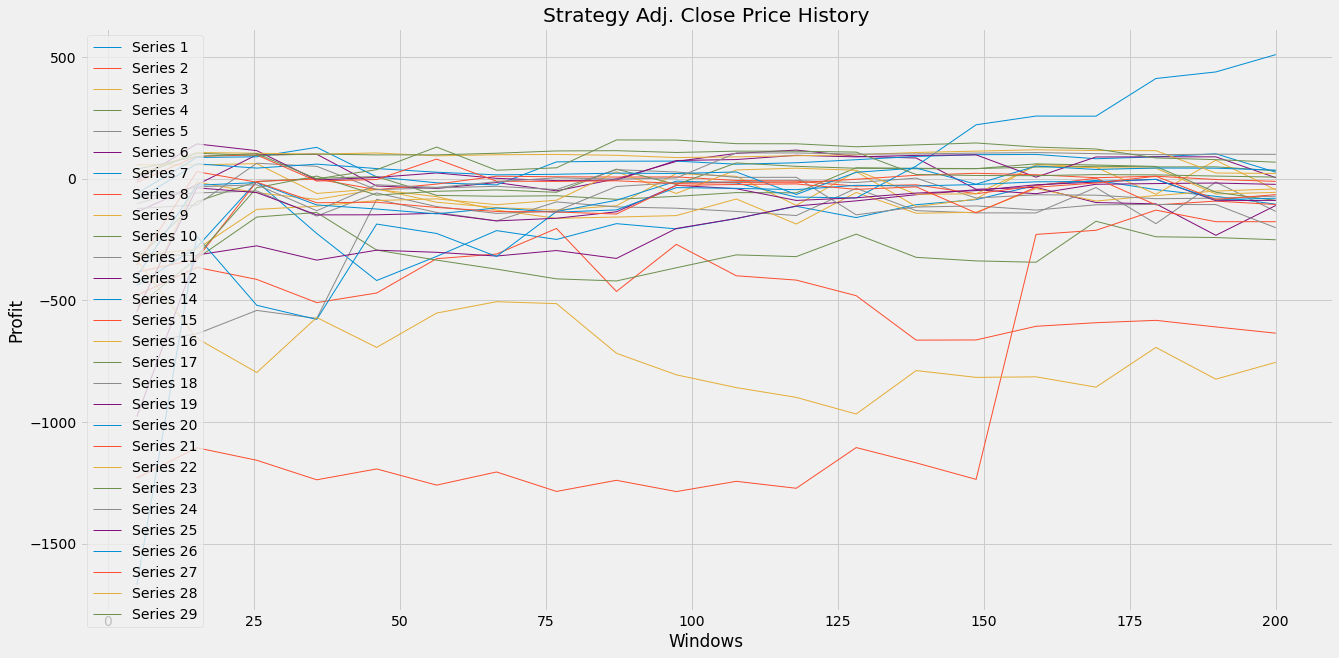

In [298]:
# finding best returns
#Visualise the data
del profit_df['Series 13']
plt.figure(figsize=(20, 10))
plt.plot(profit_df, linewidth = 1)
plt.title('Strategy Adj. Close Price History')
plt.xlabel('Windows')
plt.ylabel('Profit')
plt.legend(profit_df, loc='upper left')
plt.show()



In [299]:
profit_df

,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,...,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
5.000000,-438.729571,-479.353249,57.589482,-525.396541,-672.397338,-137.524444,-61.007363,-1230.6754,-550.52379,-329.488051,...,-86.985962,-14.387533,16.18747,10.011189,-102.6016,-545.494321,-400.987652,-354.660637,-335.02994,39.220779
15.263158,-281.592398,-364.495892,56.982337,-327.843806,-638.14326,-24.960069,87.343179,-1106.149948,-14.005719,-94.250198,...,61.337737,92.246485,107.931728,104.733636,-33.346304,-37.502274,-26.790175,29.123976,-656.037924,91.428571
25.526316,-11.671359,-413.995519,61.96036,-157.536888,-541.497607,98.52816,90.113543,-1157.668967,-57.628222,-11.824669,...,43.699422,97.636124,104.752654,96.073227,-24.764375,-56.937212,-15.763599,-14.285107,-796.806387,103.376623
35.789474,-225.078044,-509.439881,-60.520851,-138.800437,-574.386319,100.652326,128.963385,-1237.967534,-84.753465,1.486861,...,60.0,-9.480482,101.42649,101.379996,-131.64505,-148.634997,-107.743228,-98.819723,-570.658683,-0.519481
46.052632,-418.534615,-469.895444,-41.348015,-293.404195,-84.713198,-29.912973,7.618746,-1193.301167,-44.108778,8.971571,...,41.767135,-3.316563,105.904392,97.983465,-24.827064,-148.31833,-124.617163,-96.531449,-693.612774,37.142857
56.315789,-319.408398,-328.790142,-96.560217,-334.639937,-138.558168,-40.026272,-16.790597,-1259.832716,-73.619389,-68.513139,...,26.754748,80.734853,94.096302,98.163735,-35.798746,-142.270904,-144.351671,-118.077922,-552.39521,130.12987
66.578947,-213.340883,-309.65646,-118.840101,-371.748068,-173.443737,-15.643892,-25.433617,-1205.792751,-129.039907,-72.184279,...,15.937242,-10.178049,98.633178,104.763474,-12.275184,-173.376162,-120.485618,-134.536979,-505.638723,34.805195
76.842105,-249.649568,-204.473488,-128.640144,-411.73252,-95.30821,-49.945515,69.250207,-1285.757032,-162.900806,-69.946766,...,18.265896,-11.0005,99.832096,114.253745,3.868353,-162.593895,-137.42575,-136.723684,-513.572854,44.935065
87.105263,-184.715676,-463.622106,-111.145037,-420.346534,-115.826648,-0.325417,71.964643,-1239.976062,-157.480287,-84.708347,...,22.923204,-8.462678,96.351905,115.355256,-1.484003,-135.957495,-128.156471,-145.158901,-717.61477,159.480519
97.368421,-206.189937,-269.87304,21.262355,-366.089608,-121.252671,71.208073,72.415987,-1286.405034,-151.586942,-72.477064,...,21.486375,-19.221437,87.004094,107.916952,3.258755,-27.175731,-36.480463,-27.080223,-806.337325,158.961039
